In [1]:
import pyfa_tool as pyfa
print(pyfa.__version__)

0.0.2a


## The different pyfa classes
There are 3 classes in pyfa that you can use and create. Each of these classes has a specific application, which must be used accordingly by the user. 
* The **FaFile**class: For quick and fast inspection of what can be found in an FA file
* The **FaDataset** class: Holds data and methods to work with a xarray.Dataset equivalent of the FA file.
* The **FaCollection** class: Holds methods on how to combine multiple FaDatasets.

In this example, we will introduce the most common functionalities of FaFile and FaDataset classes.

## FaFile : Fast overview of the Fa content
We start by defining the paths to the FA files we want to use in pyfa. We use the demo FA file for this example.
Then we create a FaFile object for the demo FA file.

In [2]:
fa_filepath = pyfa.demo_fa_climate
print(fa_filepath)

#Now we create a FaFile object
fafile = pyfa.FaFile(fafile=fa_filepath)
print(fafile)

/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732
FA-file at /home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732


The FaFile holds only the meta-data and fieldnames from the FA file. You can get them using these getters, which can be handy if you want a deep inspection.

In [3]:
fieldnames_dataframe = fafile.get_fieldnames()
print(fieldnames_dataframe.head()) #Print only the first lines

metadata = fafile.get_metadata()
print(metadata) #The metadata is stored in a dictionary

               name  offset  length  spectral  nbits  index  sptrunc  sppow
0   PROFTEMPERATURE   77128  145888     False   16.0      8      NaN    NaN
1    PROFRESERV.EAU  223016  145888     False   16.0      9      NaN    NaN
2  PROFRESERV.GLACE  368904  145888     False   16.0     10      NaN    NaN
3  SURFRESERV.NEIGE  514792  145888     False   16.0     11      NaN    NaN
4  SURFALBEDO NEIGE  660680  145888     False   16.0     12      NaN    NaN
{'basedate': ['2022-12-01'], 'validate': ['2022-12-31 12:00:00'], 'leadtime': ['732'], 'timestep': ['450'], 'origin': ['/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732'], 'projection': ['lcc'], 'lon_0': [9.9], 'lat_1': [49], 'lat_2': [49], 'proj_R': [6371229], 'nx': [251], 'ny': [251], 'dx': [25000], 'dy': [25000], 'ex': [19], 'ey': [19], 'center_lon': [9.9], 'center_lat': [49], 'nfields': [410], 'filepath': ['/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732'], 'ndlux': [251], 'ndgux': [251], 'nsmax'

An general, a formatted description of what is in the FA file is handyer. The describe() prints out an overview of the FA content:

In [4]:
fafile.describe()


### File format : FA

## File name: ['/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732']
## File path: ['/home/thoverga/Documents/github/PyFa-tool/tests/data/ICMSHABOF+0732']

#################
##   VALIDITY  ##
#################

Validity               : 2022-12-31 12:00:00
Basedate               : 2022-12-01 00:00:00
Leadtime               : 30 days, 12:00:00

Timestep               : 0:07:30
N time iterations      : 5856


#######################
## HORIZONTAL GEOMETRY
#######################

Points of C+I in X      : 251
Points of C+I in Y      : 251

Kind of projection      : lcc
Reference lat (ELAT0)   : 49
Reference lon (ELON0)   : 9.9
Center lat              : 49
Center lon              : 9.9

Resolution in X (m)     : 25000
Resolution in Y (m)     : 25000


#######################
## Vertical GEOMETRY
#######################
N levels                : 46
Ref pressure            : 101325

Vert coords A           :
[0, 0.0001, 0.0003, 0.0007, 0.0013, 0.0023, 

## FaDataset Class

The FaFile class was just for printing out and inspecting the metadata of a FA file. If we want to use the data itself, we need the FaDataset class.

The FaDataset class is designed to convert a Fa file to an xarray.Dataset object, which will be stored as the `ds` attribute. You can directly use and manipulate this attribute if you like. 

There are three methods to import a FA file (*importing means to convert an FA file to an xarray.Dataset*):
* using `import_2d_field()`: This method is designed to only import a single two-dimensional field.
* using `import_3d_field()`: This methods is designed to import all 2d fields to construct a 3d field. This is done by specifying a `basename` which is the equivalent of the fieldname but without the level specifier. i.g. *TEMPERATURE* is the `basename` for all 2d fields like *S001TEMPERATURE*, *S002TEMPERATURE*, ...
*  using `import_fa()`: This is a general method where you have control over all the fields (2d and 3d) that will be imported.


### Pseudo 3D fields (intermezzo)

You might have noticed that there are so-called 'pseudo-3D' fields. These fields have data at multiple, but not all, levels. A common example is radiation which is often defined at the top of the atmosphere and at the surface. 

### Import a 2D and 3D field
We saw in the .describe of the fafile that `CLSVENT.ZONAL` (2d) and `WIND.V.PHYS` (3d) are available. As an example we will read these fields separately:


In [5]:
# Import the CLS zonal 2D field as a dataset
cls_wind_data = pyfa.FaDataset(fafile=pyfa.demo_fa_climate)
cls_wind_data.import_2d_field(fieldname='CLSVENT.ZONAL')
print(cls_wind_data) 


[1] "PROFTEMPERATURE not in whitelist"
[1] "PROFRESERV.EAU not in whitelist"
[1] "PROFRESERV.GLACE not in whitelist"
[1] "SURFRESERV.NEIGE not in whitelist"
[1] "SURFALBEDO NEIGE not in whitelist"
[1] "SURFDENSIT.NEIGE not in whitelist"
[1] "SURFALBEDO HISTO not in whitelist"
[1] "SURFTEMPERATURE not in whitelist"
[1] "SURFRESERV.EAU not in whitelist"
[1] "SURFRESERV.INTER not in whitelist"
[1] "SURFRESERV.GLACE not in whitelist"
[1] "SURFZ0.FOIS.G not in whitelist"
[1] "SURFALBEDO not in whitelist"
[1] "SURFEMISSIVITE not in whitelist"
[1] "SURFET.GEOPOTENT not in whitelist"
[1] "SURFIND.TERREMER not in whitelist"
[1] "SURFPROP.VEGETAT not in whitelist"
[1] "SURFVAR.GEOP.ANI not in whitelist"
[1] "SURFVAR.GEOP.DIR not in whitelist"
[1] "SURFPROP.ARGILE not in whitelist"
[1] "SURFPROP.SABLE not in whitelist"
[1] "SURFEPAIS.SOL not in whitelist"
[1] "SURFIND.VEG.DOMI not in whitelist"
[1] "SURFRESI.STO.MIN not in whitelist"
[1] "SURFIND.FOLIAIRE not in whitelist"
[1] "SURFRES.EVAPOTRA n

*Note: You can see that the dimensions of the xarray.dataset include the levels even for a 2D field. This is done so all methods are applicable on all types of dataset 2d, 3d or a combination of both. If you look carefully you can see that the variable `CLSVENT.ZONAL` has only the `(y, x)` dimensions, so it is a 2d field.*

In [6]:
#if you want to work directly with the xarray dataset you can do this by working with the .ds attribute:
cls_wind_data.ds['CLSVENT.ZONAL'].data.max()


21.243927882297545

In [7]:
# Import the WIND.V.PHYS 3D field as a dataset
d3wind_data = pyfa.FaDataset(fafile=pyfa.demo_fa_climate)
d3wind_data.import_3d_field(fieldname='WIND.V.PHYS')
print(d3wind_data) 

[1] "PROFTEMPERATURE not in whitelist"
[1] "PROFRESERV.EAU not in whitelist"
[1] "PROFRESERV.GLACE not in whitelist"
[1] "SURFRESERV.NEIGE not in whitelist"
[1] "SURFALBEDO NEIGE not in whitelist"
[1] "SURFDENSIT.NEIGE not in whitelist"
[1] "SURFALBEDO HISTO not in whitelist"
[1] "SURFTEMPERATURE not in whitelist"
[1] "SURFRESERV.EAU not in whitelist"
[1] "SURFRESERV.INTER not in whitelist"
[1] "SURFRESERV.GLACE not in whitelist"
[1] "SURFZ0.FOIS.G not in whitelist"
[1] "SURFALBEDO not in whitelist"
[1] "SURFEMISSIVITE not in whitelist"
[1] "SURFET.GEOPOTENT not in whitelist"
[1] "SURFIND.TERREMER not in whitelist"
[1] "SURFPROP.VEGETAT not in whitelist"
[1] "SURFVAR.GEOP.ANI not in whitelist"
[1] "SURFVAR.GEOP.DIR not in whitelist"
[1] "SURFPROP.ARGILE not in whitelist"
[1] "SURFPROP.SABLE not in whitelist"
[1] "SURFEPAIS.SOL not in whitelist"
[1] "SURFIND.VEG.DOMI not in whitelist"
[1] "SURFRESI.STO.MIN not in whitelist"
[1] "SURFIND.FOLIAIRE not in whitelist"
[1] "SURFRES.EVAPOTRA n

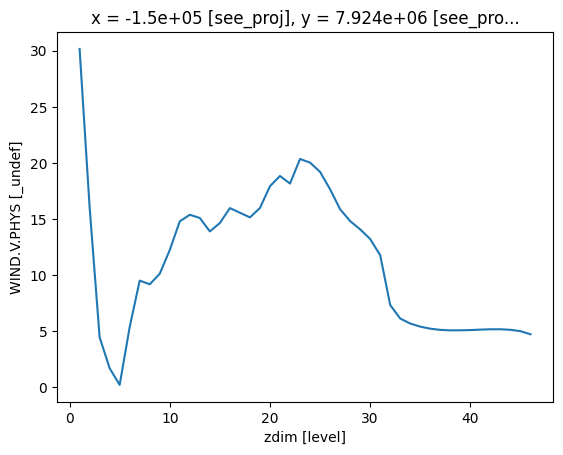

In [8]:
#basic windprofile at a random location
d3wind_data.ds['WIND.V.PHYS'].sel(x=-150000, y=7923687.901, method='nearest').plot()

Rather then using model coordinates, we can convert them to latlon. 

In [9]:
d3wind_data.reproject(target_epsg='EPSG:4326') #to latlon CRS
d3wind_data.ds #we an see the x and y coordinates are changed + a lat and lon coordinate are created (same as y an x)

Reprojecting dataset to EPSG:4326.


/home/thoverga/anaconda3/envs/metobs_dev/lib/python3.10/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


<xarray.Dataset>
Dimensions:      (lvl: 46, y: 195, x: 465, validate: 1, basedate: 1)
Coordinates:
  * x            (x) float64 -59.61 -59.31 -59.01 -58.71 ... 78.81 79.11 79.41
  * y            (y) float64 75.77 75.47 75.17 74.87 ... 18.54 18.24 17.94 17.64
  * lvl          (lvl) int64 1 2 3 4 5 6 7 8 9 10 ... 38 39 40 41 42 43 44 45 46
  * validate     (validate) datetime64[ns] 2022-12-31T12:00:00
  * basedate     (basedate) datetime64[ns] 2022-12-01
    lat          (y) float64 75.77 75.47 75.17 74.87 ... 18.54 18.24 17.94 17.64
    lon          (x) float64 -59.61 -59.31 -59.01 -58.71 ... 78.81 79.11 79.41
Data variables:
    WIND.V.PHYS  (lvl, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/29)
    fillvalue:      1e+32
    timestep:       450
    origin:         /home/thoverga/Documents/github/PyFa-tool/tests/data/ICMS...
    projection:     lcc
    lon_0:          9.899999999999999
    lat_1:          49.0
    ...             ...
    nlev:           46
    refpressure:    101325.0
    A_list:         [0.         0.00010731 0.00030401 0.00071116 0.00129123 0...
    B_list:         [0.         0.         0.         0.         0.         0...
    var_presision:  double
    proj4str:       +proj=longlat +datum=WGS84 +no_defs +type=crs

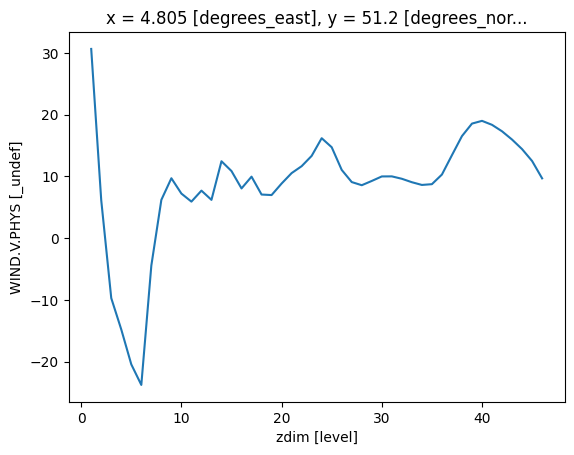

In [11]:
#basic windprofile at a random location
d3wind_data.ds['WIND.V.PHYS'].sel({'y': 51.34, 'x':4.901}, method='nearest').plot()

In [ ]:
# Import multiple fields

full_data = pyfa.FaDataset(fafile=pyfa.demo_fa_climate)

# To import all fields: 
#(Whitelist specifies all the fields (2d and 3d) to read, blacklist are all the fields to skip)

#This can take a couple of seconds.
full_data.import_fa(whitelist=None, #If none, all fields are interpreted as white 
                    blacklist=None, #If none, blacklist is empty
                   )
print(full_data.get_fieldnames())

In [ ]:
# If you are only interested in a certain set of field, you can set the white and blacklist accordingly:
full_data.import_fa(whitelist=["PROFTEMPERATURE", "SURFALBEDO.VEG", #2D fields
                               "TEMPERATURE", #3D fields
                               "S001RAYT SOL CL", "S087RAYT SOL CL", "S001RAYT THER CL", # Pseudo 3D fields
                               "S004WIND.U.PHYS", "S032WIND.U.PHYS", #Specific levels of a 3d field
                              ], 
                    blacklist=None, #If none, blacklist is empty
                   )

print(full_data)

*Note that Pseudo 3D fields are imported as a set of 2D fields. So add them into the white/black lists with there according 2D fieldnames (= thus with the `S00x` prefix).*

## Usefull Dataset methods
Here is a collection of useful data methods:

### Get info
Some methods useful for extracting info

In [ ]:
print(f' fieldnames: {full_data.get_fieldnames()}')
print(f' basedate: {full_data.get_basedate()}')
print(f' leadtime: {full_data.get_leadtime()}')

### Plot and reproject
A geospatial plot method is available to plot 2d fields or a 2d crosssection of a 3d field. If the coordinates are in lat-lon, the land and sea borders can be drawn as well. 

In [ ]:
#make a plot at the model CRS (without reprojectiong)
full_data.plot(variable='TEMPERATURE', level=21)

In [ ]:
#First we reproject to latlon using the epsg code
full_data.reproject(target_epsg='EPSG:4326')

# Then we plot a field
full_data.plot(variable='PROFTEMPERATURE',
               level=None, #only required for 3d fields
               title=None, # 
               grid=False,
               land=None, #if in latlon, then this will we set to True by default and the boarders are drawn
               coastline=None, #equivalent to land
               contour=False, #Set to true if you want a contour plot
               contour_levels=10, #only used if contour
               # **kwargs,
               cmap = 'viridis', #kwargs passed to xarray.plot()
              )

## Saving an opening netCDF 
We can save the FA data to a netCDF file format, which can be opened or used by many other programs.

In [ ]:

import os
outputfolder = os.getcwd() #specify an output folder

full_data.save_nc(outputfolder = outputfolder,
                  filename='some_fields_of_the_demo_fa_file.nc',
                  overwrite=True)

To read a netcdf file, you can use xarray or use the pyfa method (wrapper on xarray.read_netDF)

In [ ]:
path_to_nc = os.path.join(outputfolder,'some_fields_of_the_demo_fa_file.nc')
new_dataset = pyfa.FaDataset()
new_dataset.read_nc(path_to_nc)